In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels.tsa.api module that are related to time series analysis and forecasting
from statsmodels.tsa.api import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [84]:
df.shape
#847 Rows & 2columns

(847, 2)

# Explorartory Data Analysis

In [85]:
#Understanding the Dataset 
print(f"Data range of gold price available from - {df.loc[:,'Date'][0]} to  {df.loc[:,'Date'][len(df)-1]} ")

Data range of gold price available from - 1950-01 to  2020-07 


In [86]:
date=pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [87]:
df['Month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('Month')
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


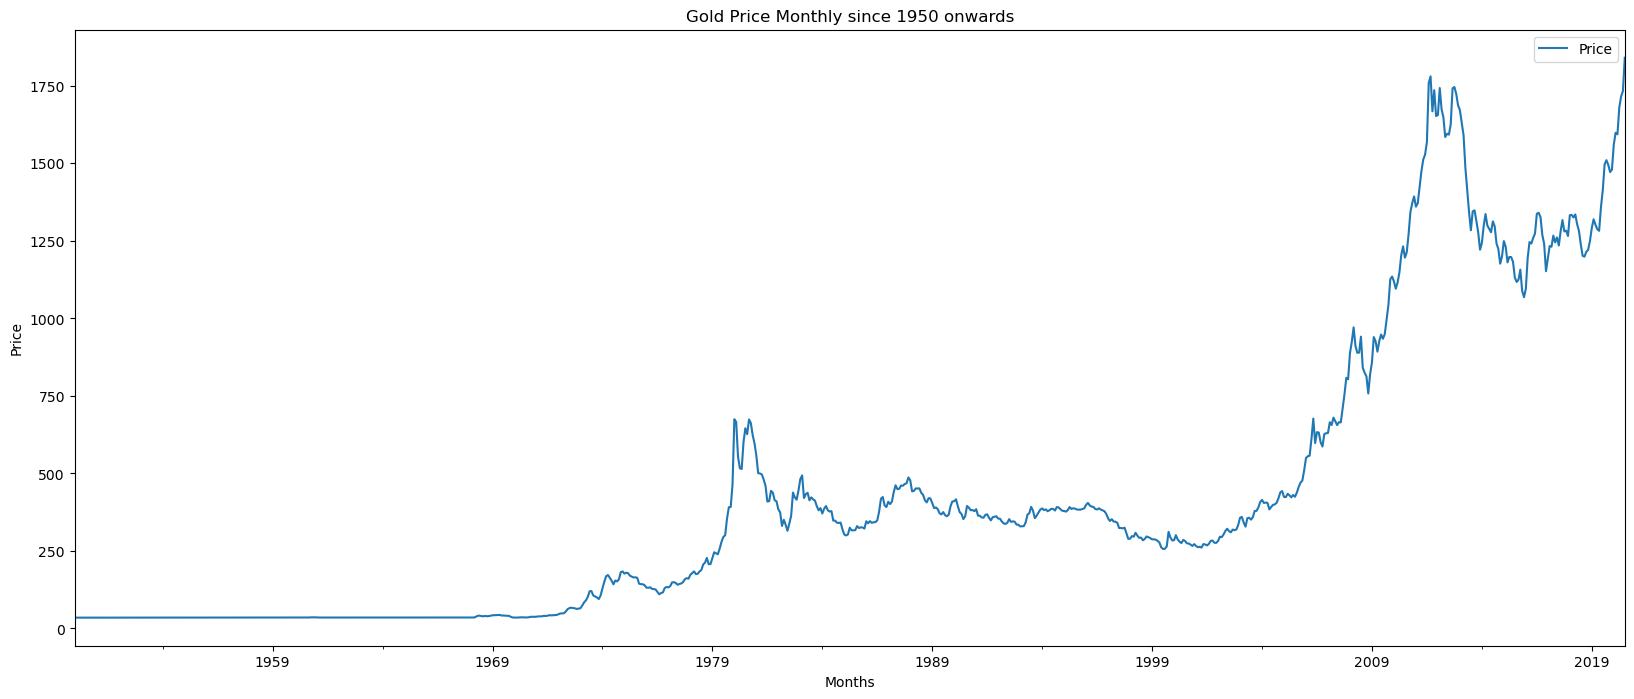

In [88]:
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly since 1950 onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()


In [89]:
df.columns

Index(['Price'], dtype='object')

In [90]:
df['Price']

Month
1950-01-31      34.730
1950-02-28      34.730
1950-03-31      34.730
1950-04-30      34.730
1950-05-31      34.730
                ...   
2020-03-31    1593.764
2020-04-30    1680.030
2020-05-31    1715.697
2020-06-30    1734.032
2020-07-31    1840.807
Name: Price, Length: 847, dtype: float64

In [91]:
overview=df.describe()
overview

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [92]:
#The Average gold price in last 70years is $416
#25% of time the gold price is $35.190
#Higehst old price is touched to $1840

# Visual Analysis

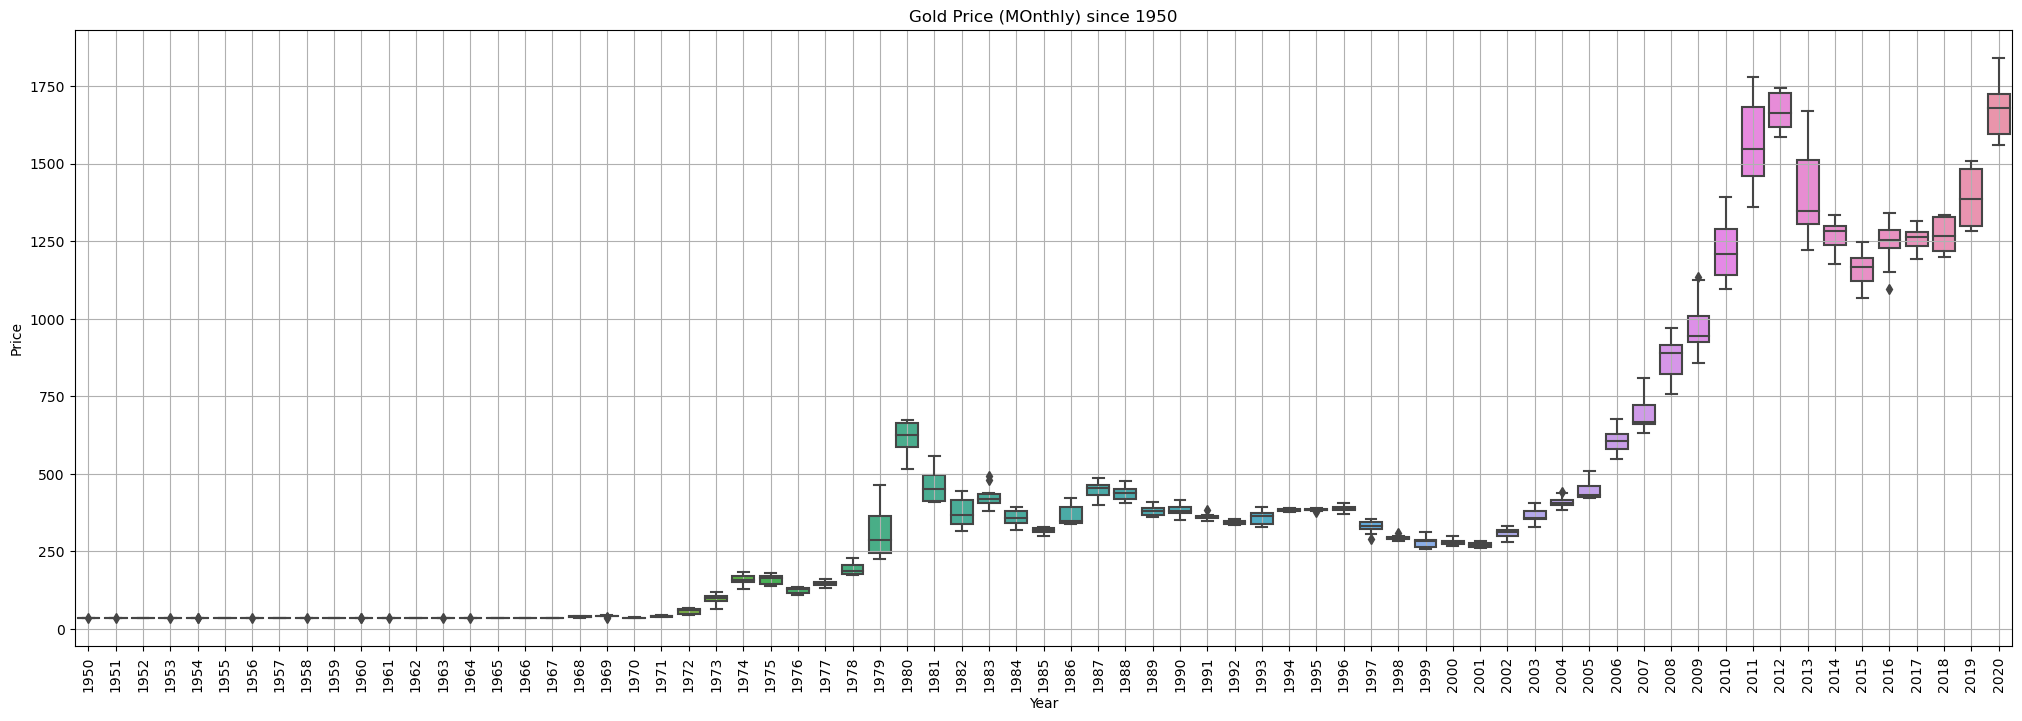

In [93]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title('Gold Price (MOnthly) since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

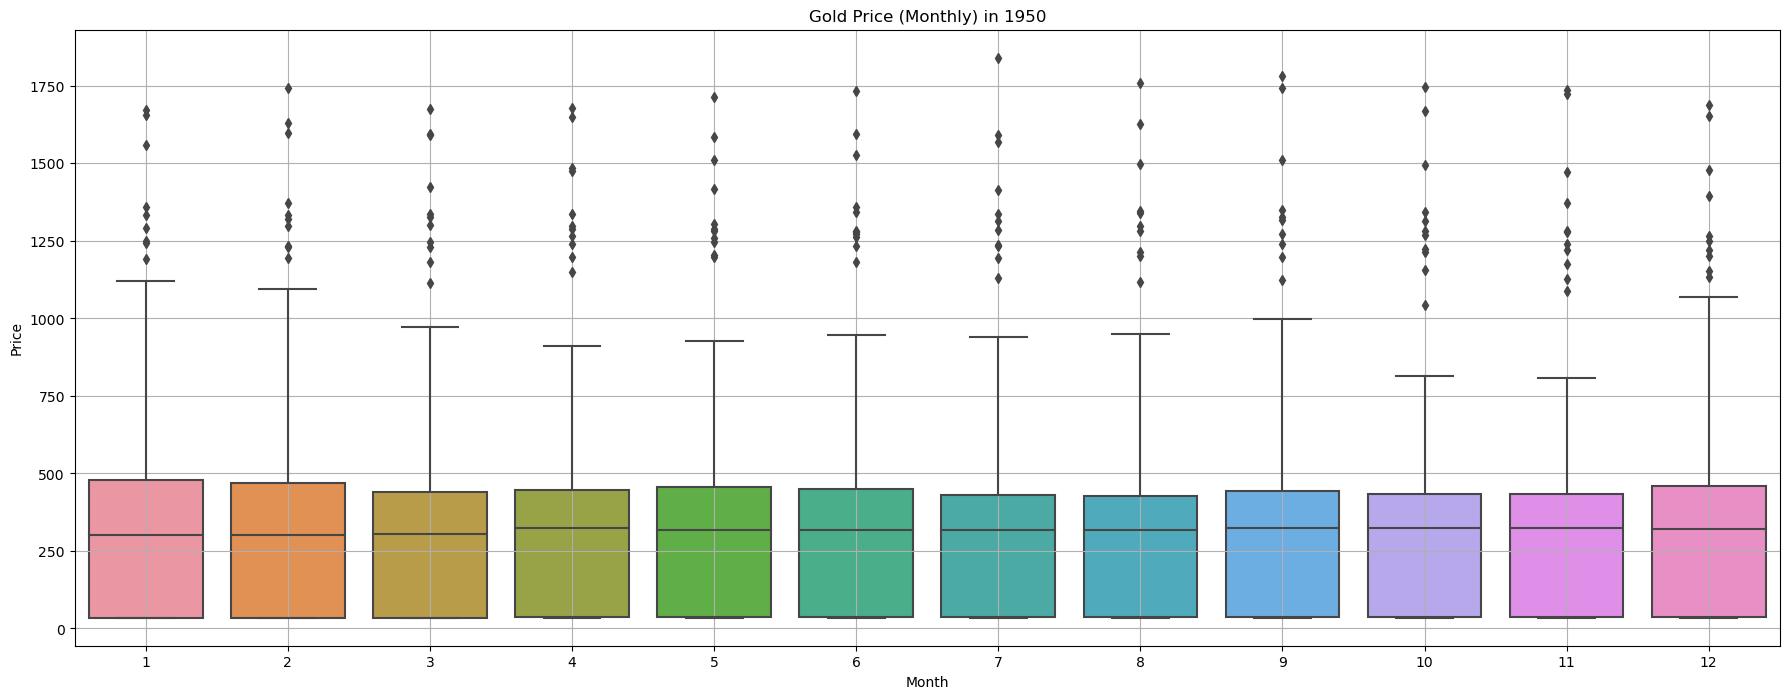

In [115]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month, y=df['Price'],ax=ax)
plt.title("Gold Price (Monthly) in 1950")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

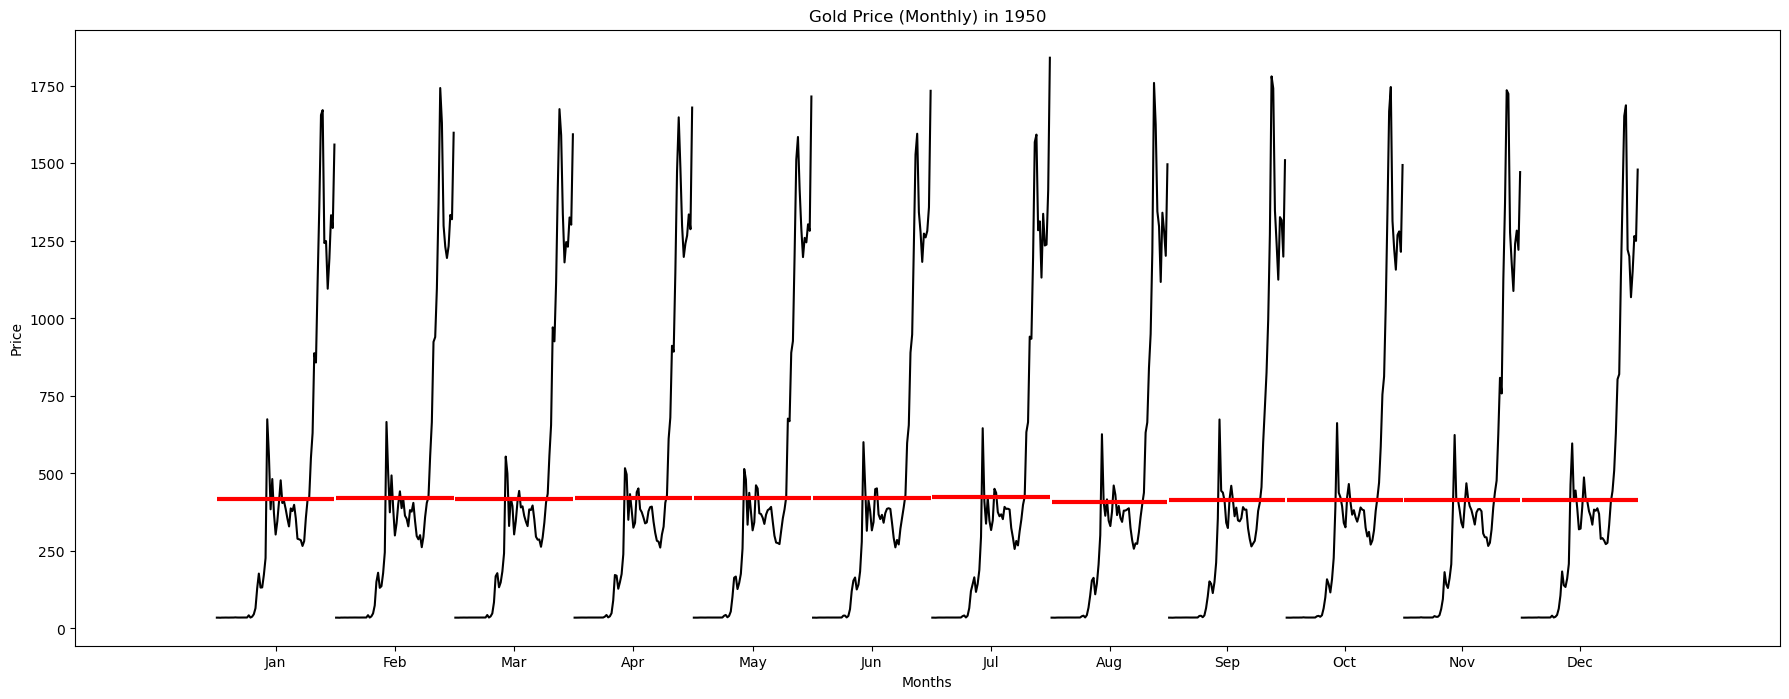

In [109]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax=plt.subplots(figsize=(22,8))

month_plot(df,ylabel='GOLD Price', ax=ax)
plt.title('Gold Price (Monthly) in 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

In [118]:
#In resample the 'M' stands for Month, 'A' stands for Annual, Q stands for Quartile

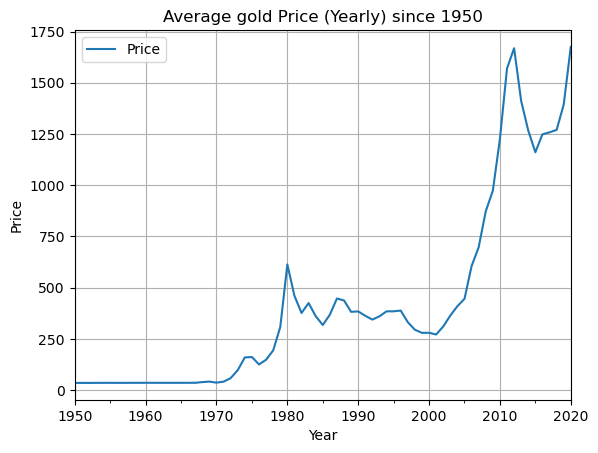

In [121]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

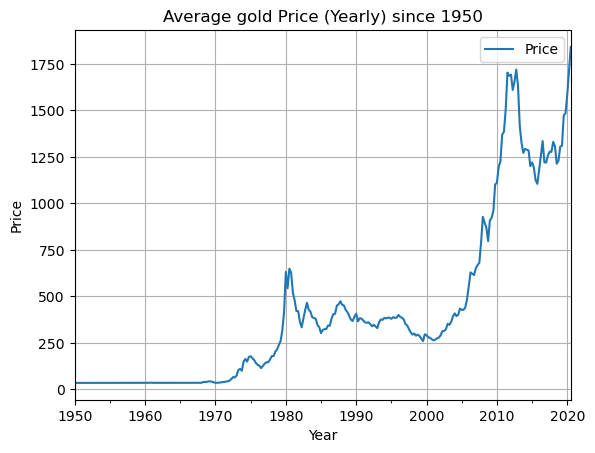

In [124]:
df_yearly_sum=df.resample('Q').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Quartile')
plt.ylabel('Price')
plt.grid()

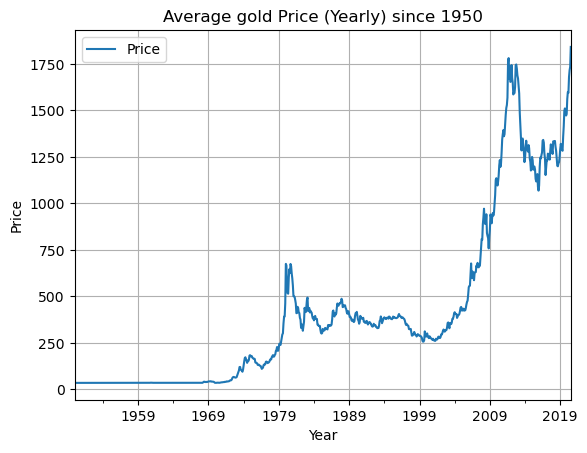

In [125]:
df_yearly_sum=df.resample('M').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

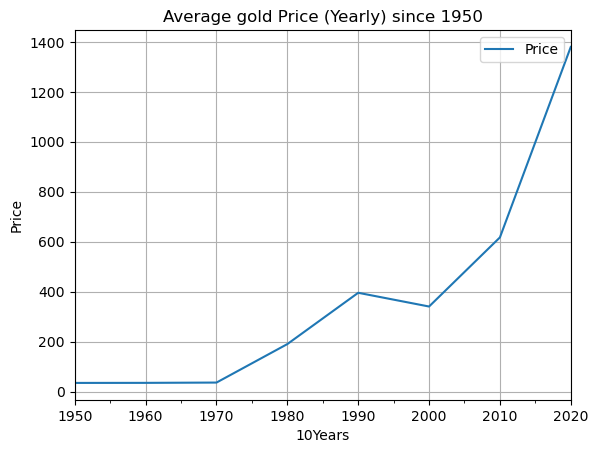

In [127]:
df_yearly_sum=df.resample('10Y').mean()
df_yearly_sum.plot()
plt.title('Average gold Price (Yearly) since 1950')
plt.xlabel('10Years')
plt.ylabel('Price')
plt.grid()

In [160]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['CoV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1['CoV_pct']
df_1[20:90]

,Mean,Std,CoV_pct
Month,,,
1970,35.949250,0.992921,2.76
1971,40.787750,1.896799,4.65
1972,58.104500,8.251597,14.20
1973,97.124500,16.687858,17.18
1974,159.096083,15.830452,9.95
1975,161.092500,14.982186,9.30
1976,124.828917,8.132069,6.51
1977,147.711833,9.272161,6.28
1978,193.354750,17.953643,9.29


In [149]:
df['Price'].idxmax()

Timestamp('2020-07-31 00:00:00')